In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics 
from sklearn import linear_model
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import validation_curve, ValidationCurveDisplay, cross_val_score

from kan import *

In [2]:
# Решил убрать показатели цепочки пептида и протеина, потому что их нельзя использовать для составления регрессии

df = pd.concat(map(pd.read_csv, ['input_bcell.csv', 'input_sars.csv']), ignore_index=True) 
df = df.drop(columns= ['peptide_seq','protein_seq','parent_protein_id'])
# df = pd.get_dummies(df, columns=['peptide_seq','protein_seq'])

print(f"{df.shape}")

#Задаём значение Х и у
y = df['target']
X = X = df.drop(columns = 'target')
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.8)
#Прогнозируем валентность антител (target 1 - антитела валентны)

(14907, 11)


In [6]:
df.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,161,165,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,251,255,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,145,149,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,152,156,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,85,89,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


# Ковид - регрессия Решающими деревьями по максимальной глубине

In [51]:
#Решающие деревья
rg_tree = DecisionTreeRegressor(random_state=0, max_depth=10)
rg_tree.fit(X_train, y_train)
rg_tree.score(X_test,y_test)

0.10826322603595939

## Кросс валидация Decision Tree Regression

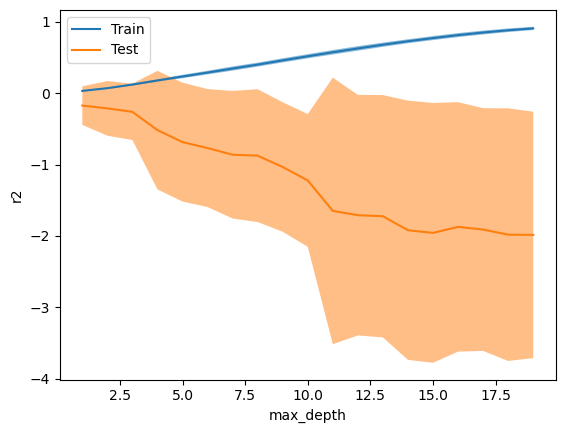

In [52]:
param_range = np.arange(0, 20, 1)
train_scores, test_scores = validation_curve(rg_tree, X, y, param_name="max_depth", param_range=param_range, n_jobs=-1, cv=10, scoring="r2")
display = ValidationCurveDisplay( param_name='max_depth', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="r2" )
display.plot()


## Набор оценочных показателей (Decision Tree)

In [53]:
print(f"MSE|RMSE :{metrics.mean_squared_error(y_test, rg_tree.predict(X_test), squared=True), metrics.mean_squared_error(y_test, rg_tree.predict(X_test), squared=False)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, rg_tree.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, rg_tree.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, rg_tree.predict(X_test))}")
print(f"Mean squared logarithmic error regression loss.: {metrics.mean_squared_log_error(y_test, rg_tree.predict(X_test))}")

MSE|RMSE :(0.17678685545789435, 0.4204602899893096)
MAE: 0.25047883145017663
MAPE: 532545460911154.75
R2: 0.10826322603595939
Mean squared logarithmic error regression loss.: 0.0852024281231848


/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Градиентный бустинг

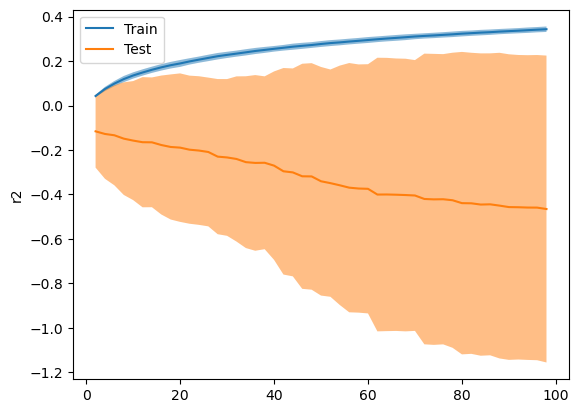

In [54]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
gbr.score(X_test,y_test)

param_range = np.arange(0, 100, 2)
train_scores, test_scores = validation_curve(gbr, X, y, param_name="n_estimators", param_range=param_range, n_jobs=-1, cv=10, scoring="r2")
display = ValidationCurveDisplay( param_name='', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="r2" )
display.plot()

## Набор оценочных показателей (GBRR)

In [55]:
print(f"MSE|RMSE :{metrics.mean_squared_error(y_test, gbr.predict(X_test), squared=True), metrics.mean_squared_error(y_test, gbr.predict(X_test), squared=False)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, gbr.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, gbr.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, gbr.predict(X_test))}")

MSE|RMSE :(0.14507824595084534, 0.3808913834032549)
MAE: 0.3032994701598961
MAPE: 671802293829204.0
R2: 0.26820573463177444


/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Ближайшие соседи (регрессия)

In [56]:
knn_r = KNeighborsRegressor()
knn_r.fit(X_train, y_train)
knn_r.score(X_test, y_test)

-0.0555209986878038

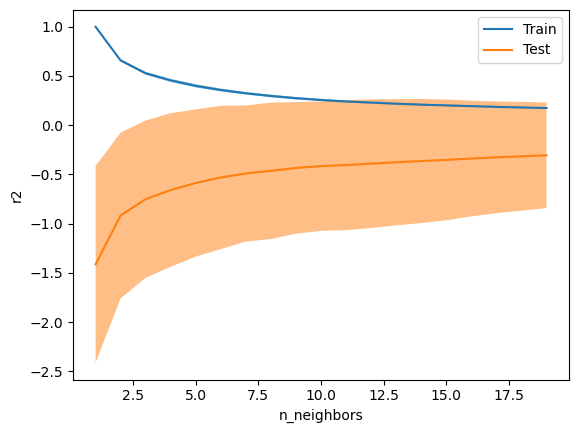

In [57]:
param_range = np.arange(0, 20, 1)
train_scores, test_scores = validation_curve(knn_r, X, y, param_name="n_neighbors", param_range=param_range, n_jobs=-1, cv=10, scoring="r2")
display = ValidationCurveDisplay( param_name='n_neighbors', param_range=param_range, train_scores=train_scores, test_scores=test_scores, score_name="r2" )
display.plot()

## Набор оценочных показателей (KNNR)

In [58]:

print(f"MSE|RMSE :{metrics.mean_squared_error(y_test, knn_r.predict(X_test), squared=True), metrics.mean_squared_error(y_test, knn_r.predict(X_test), squared=False)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, knn_r.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, knn_r.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, knn_r.predict(X_test))}")
print(f"Mean squared logarithmic error regression loss.: {metrics.mean_squared_log_error(y_test, knn_r.predict(X_test))}")

MSE|RMSE :(0.2092570853597183, 0.4574462649970139)
MAE: 0.34888478953546875
MAPE: 741209571407245.6
R2: -0.0555209986878038
Mean squared logarithmic error regression loss.: 0.10462289266961784


/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/kali/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Квантильная регрессия

In [59]:
quantile_reg = linear_model.QuantileRegressor(quantile=0.5, alpha=0.2,  fit_intercept=True, solver='highs-ipm')
quantile_reg.fit(X_train, y_train)
quantile_reg.score(X_test, y_test)

-0.37459658828953435

# Линейная регрессия

In [60]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.05529162616712835

# Ридж регрессия

In [61]:
ridge_reg = linear_model.Ridge(alpha=0.5, fit_intercept=True)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.0553911080925833

# Регрессия лассо

In [62]:
lasso_reg = linear_model.Lasso(alpha=0.5, fit_intercept=True)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.0042274150120636955

# Новая нейросеть Колмогорова - Арнольда (KAN)


Нейросеть KAN (Kernel Attention Network) — это один из современных подходов в области машинного обучения, который объединяет идеи свёрточных нейронных сетей (Convolutional Neural Networks, CNNs) и механизмов внимания (Attention mechanisms). KAN предназначена для улучшения эффективности и точности обработки данных, особенно в задачах, связанных с анализом временных рядов, обработки изображений и других данных, где пространственные и временные зависимости играют ключевую роль.

Перед началом работы с новой архитектурой нейросети можно перейти по ссылке на github разработчиков 
https://github.com/KindXiaoming/pykan 
или просто установить следующие пакеты:

    

 matplotlib==3.6.2


scikit_learn==1.1.3

setuptools==65.5.0

sympy==1.11.1

torch==2.2.2

tqdm==4.66.2

Основная библиотека работы с KAN называется pykan

    pip install pykan

Shape of train_input: torch.Size([11925, 10])
Shape of train_label: torch.Size([11925, 1])
Shape of test_input: torch.Size([2982, 10])
Shape of test_label: torch.Size([2982, 1])


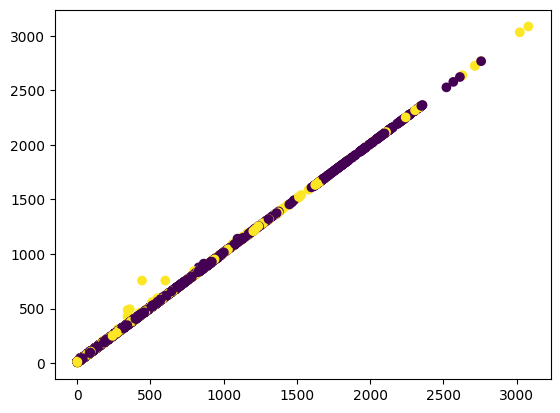

In [3]:
from kan import *
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Converting training data into PyTorch tensors
train_input = torch.tensor(train_df.drop(columns=['target']).values, dtype=torch.float32)
train_label = torch.tensor(train_df['target'].values, dtype=torch.float32).unsqueeze(1)

# Converting testing data into PyTorch tensors
test_input = torch.tensor(test_df.drop(columns=['target']).values, dtype=torch.float32)
test_label = torch.tensor(test_df['target'].values, dtype=torch.float32).unsqueeze(1)

# Creating the dataset dictionary
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Checking the dimensions of the data
print("Shape of train_input:", dataset['train_input'].shape)
print("Shape of train_label:", dataset['train_label'].shape)
print("Shape of test_input:", dataset['test_input'].shape)
print("Shape of test_label:", dataset['test_label'].shape)

# Visualizing training data
X_train = dataset['train_input']
y_train = dataset['train_label']
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:,0])


In [8]:
# Так как у нас задача регрессии, на у нас будет 10 входов (10 столбцов, исключая target, 1 выход)
# формируем KAN: 2D входы, 1D выходы, 5 скрытых нейронов, 
# кубические сплайны и сетка на 5 точках.

model = KAN(width=[10,1], grid=5, k=3, seed=0)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 4.26e-01 | test loss: 4.25e-01 | reg: 3.92e+00 : 100%|██| 20/20 [00:03<00:00,  5.20it/s]


(0.7351781725883484, 0.7350771427154541)

In [5]:
import torch

def train_mae():
    return torch.mean(torch.abs(model(dataset['train_input'])[:,0] - dataset['train_label'][:,0]))

def test_mae():
    return torch.mean(torch.abs(model(dataset['test_input'])[:,0] - dataset['test_label'][:,0]))

def train_mse():
    return torch.mean((model(dataset['train_input'])[:,0] - dataset['train_label'][:,0])**2)

def test_mse():
    return torch.mean((model(dataset['test_input'])[:,0] - dataset['test_label'][:,0])**2)

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc, train_mae, test_mae, train_mse, test_mse))

train_acc, test_acc = results['train_acc'][-1], results['test_acc'][-1]
train_mae, test_mae = results['train_mae'][-1], results['test_mae'][-1]
train_mse, test_mse = results['train_mse'][-1], results['test_mse'][-1]

print(f"Train accuracy: {train_acc}\n") 
print(f"Test accuracy: {test_acc}\n") 
print(f"Train MAE: {train_mae}\n") 
print(f"Test MAE: {test_mae}\n") 
print(f"Train MSE: {train_mse}\n") 
print(f"Test MSE: {test_mse}\n")


train loss: 4.23e-01 | test loss: 4.22e-01 | reg: 3.25e+00 : 100%|██| 20/20 [00:04<00:00,  4.45it/s]

Train accuracy: 0.7338364720344543

Test accuracy: 0.7377598881721497

Train MAE: 0.35878992080688477

Test MAE: 0.357664555311203

Train MSE: 0.17930735647678375

Test MSE: 0.17833635210990906



In [6]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with abs, r2=0.9999447464942932
fixing (0,1,0) with abs, r2=0.999936044216156
fixing (0,2,0) with tanh, r2=0.9497767090797424
fixing (0,3,0) with x^3, r2=0.9891162514686584
fixing (0,4,0) with tan, r2=0.9454817175865173
fixing (0,5,0) with sin, r2=0.9901576638221741
fixing (0,6,0) with sin, r2=0.9499074816703796
fixing (0,7,0) with x^4, r2=0.5683510899543762
fixing (0,8,0) with sin, r2=0.9710838198661804
fixing (0,9,0) with sin, r2=0.8962866067886353


-4265.95*(0.08 - x_8)**4 - 0.22*(1 - 0.06*x_4)**3 - 0.11*sin(0.11*x_10 - 8.4) + 0.08*sin(0.44*x_6 + 1.59) - 0.14*sin(0.8*x_7 - 0.21) + 0.26*sin(1.26*x_9 + 5.86) - 0.09*tan(3.11*x_5 - 6.09) + 0.14*tanh(6.68*x_3 - 8.25) + 0.75